In [35]:
import pandas as pd 
import numpy as np 


In [36]:
corpus = pd.read_csv("Corpus.csv")

In [37]:
corpus.head()

,name,0,1,2,3,4,5,6,7,8,9
0,احتفظ,البريطاني|3,الصربي|2,بلقبه|2,بنفيكا|1,بفانيلته|1,بميدالية|1,برشلونة|1,فان|1,الملاكم|1,به|1
1,بنفيكا,البرتغالي|75,[توكن]|21,الذي|9,في|9,على|7,بطل|6,من|5,رصيده|5,حامل|4,المتصدر|4
2,بمركز,الصدارة|3,الوصيف|2,الرقم|2,واحد|2,اساسي|1,معينودفع|1,الانطلاق|1,NaN,NaN,NaN
3,الصدارة,بفارق|88,[توكن]|72,برصيد|48,في|40,بفوزه|25,من|25,بعد|23,مع|17,عندما|16,إلى|14
4,بعد,أن|1019,[توكن]|500,ان|471,فوزه|278,تمريرة|256,المباراة|164,طرد|162,غد|148,الفوز|137,مرور|131


In [46]:
corpus.loc[corpus["name"]=="برشلونة"]

,name,0,1,2,3,4,5,6,7,8,9
209,برشلونة,في|365,الإسباني|324,[توكن]|143,على|118,الذي|110,حامل|77,إلى|72,|72,من|69,وريال|62


In [132]:

def get_values(result,touken=False):
    allx = []
    new_values = []
    for x in recomanded[1:]:
        if x is not np.nan:
            print(x)
            value ,freq= x.split("|")
            new_values.append([int(freq),value])
    return new_values

def get_probibilties(possiblities:list[str],threshold=0.1):
    total = 0
    probs = []
    new_possiblities = []
    for pos in possiblities :
        total+=pos[0]
    for i,pos in enumerate(possiblities) :
        new_possiblities.append([pos[0]/total,pos[1]])
        probs.append(pos[0]/total)
    
    if all(prob >threshold for prob in probs) :
        return new_possiblities
    else :
        possiblities = [possiblities[i] for i,prob in enumerate(probs) if prob > threshold]
        return get_probibilties(possiblities,threshold=threshold)

def sample_distrubtion(probs):
    probilities , values = zip(*probs)

    ran_value = np.random.choice(values,p=probilities)

    return ran_value

def reccomand(text:str,thershold=0.1):
    word = text.split(" ")
    word = word[-1]
    result = corpus.loc[corpus["name"]==word].squeeze()
    result = get_values(result)
    probs = get_probibilties(result,threshold=thershold)
    recomanded = sample_distrubtion(probs)

    return recomanded
text = "فاز ليونيل"

recomanded = reccomand(text)
print(recomanded)



# x = [reccomand(text) for i in range(1000)]

ي


ValueError: not enough values to unpack (expected 2, got 1)

(array([   0.,    0.,    0.,    0.,    0., 1000.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

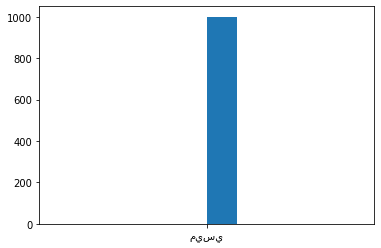

In [124]:
import matplotlib.pyplot as plt 

plt.hist(x)